In [1]:
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

In [2]:
bike_sharing= pd.read_csv('~/aiffel/bike-sharing-demand/train.csv')
print(bike_sharing.shape)
bike_sharing.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
type(bike_sharing.datetime)

pandas.core.series.Series

In [5]:
bike_sharing['New_time'] = pd.to_datetime(bike_sharing.datetime)

In [6]:
bike_sharing['year'] = bike_sharing['New_time'].dt.year
bike_sharing['month'] = bike_sharing['New_time'].dt.month
bike_sharing['day'] = bike_sharing['New_time'].dt.day
bike_sharing['hour'] = bike_sharing['New_time'].dt.hour
bike_sharing['minute'] = bike_sharing['New_time'].dt.minute
bike_sharing['second'] = bike_sharing['New_time'].dt.second

In [7]:
print(bike_sharing.shape)
bike_sharing.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,New_time,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011,1,1,4,0,0


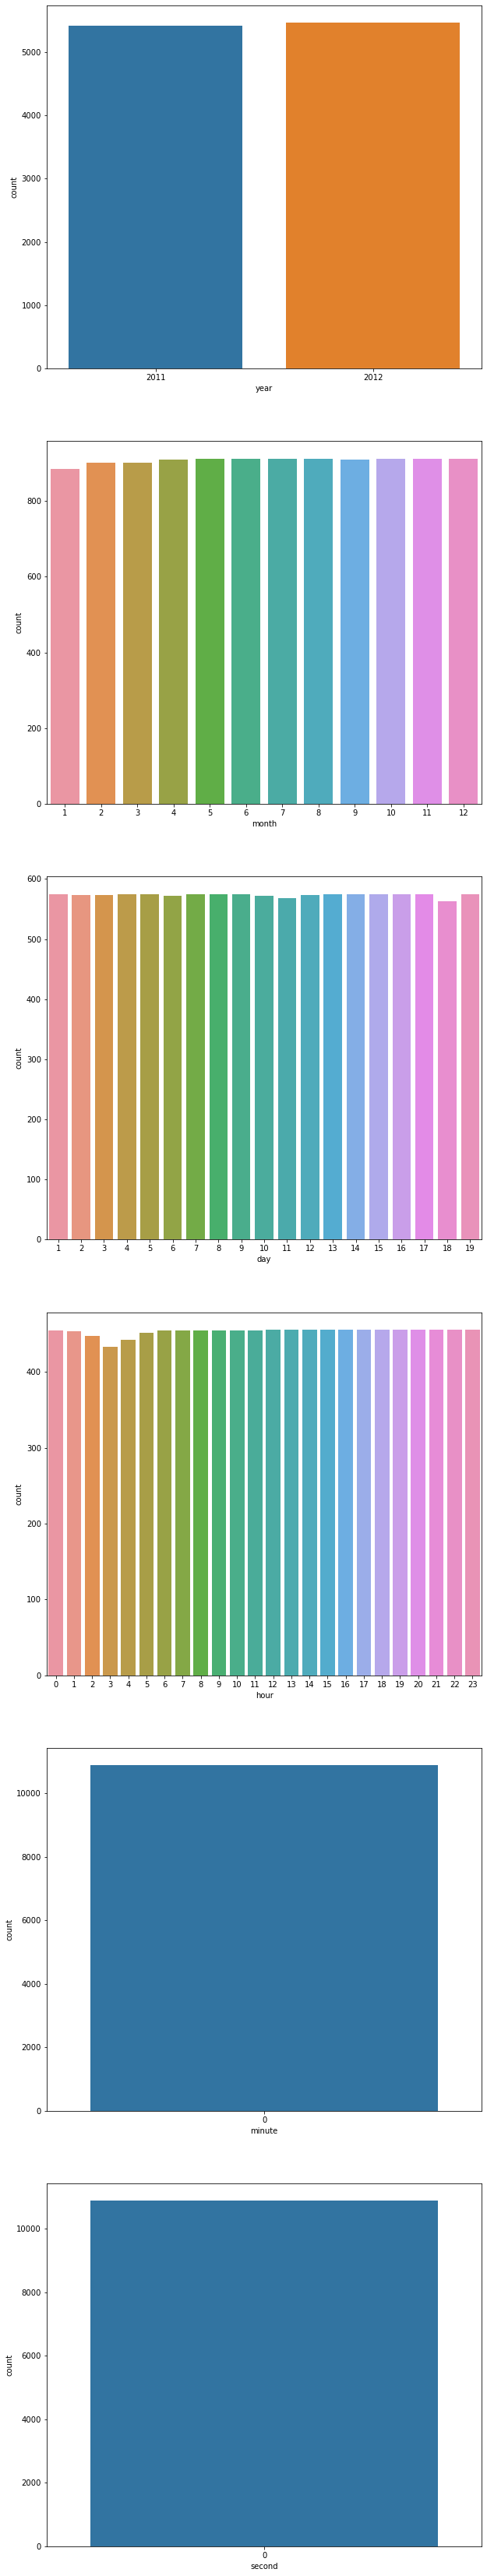

In [8]:
plt.figure(figsize=(10,60))#10,60

plt.subplot(611)
sns.countplot(x="year", data=bike_sharing)

plt.subplot(612)
sns.countplot(x="month", data=bike_sharing)

plt.subplot(613)
sns.countplot(x="day", data=bike_sharing)

plt.subplot(614)
sns.countplot(x="hour", data=bike_sharing)

plt.subplot(615)
sns.countplot(x="minute", data=bike_sharing)

plt.subplot(616)
sns.countplot(x="second", data=bike_sharing)

In [9]:
print(bike_sharing.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'New_time', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


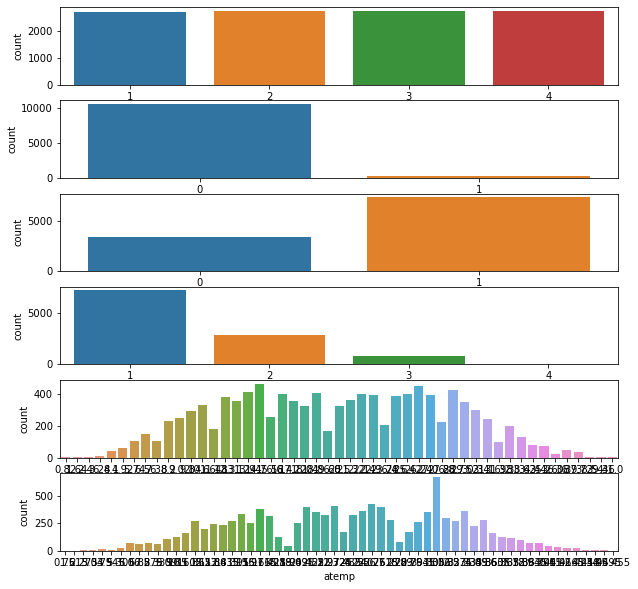

In [10]:
plt.figure(figsize=(10,10))#10,60

plt.subplot(611)
sns.countplot(x="season", data=bike_sharing)

plt.subplot(612)
sns.countplot(x="holiday", data=bike_sharing)

plt.subplot(613)
sns.countplot(x="workingday", data=bike_sharing)

plt.subplot(614)
sns.countplot(x="weather", data=bike_sharing)

plt.subplot(615)
sns.countplot(x="temp", data=bike_sharing)

plt.subplot(616)
sns.countplot(x="atemp", data=bike_sharing)

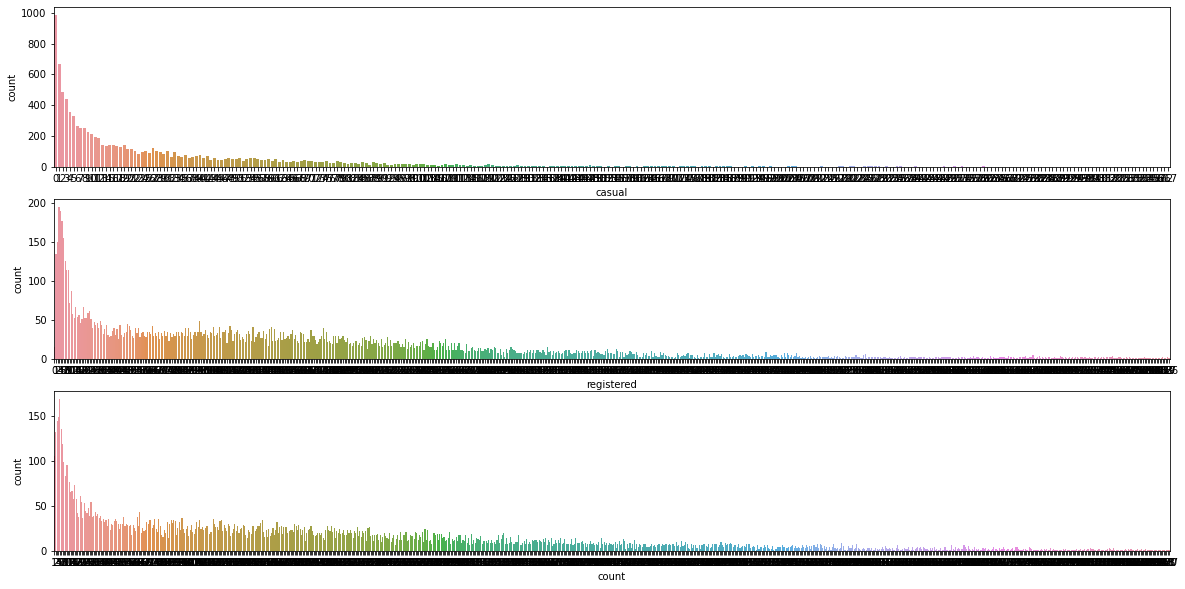

In [11]:
plt.figure(figsize=(20,10))#10,60

plt.subplot(311)
sns.countplot(x="casual", data=bike_sharing)

plt.subplot(312)
sns.countplot(x="registered", data=bike_sharing)

plt.subplot(313)
sns.countplot(x="count", data=bike_sharing)

#의미 없는 값이던 second, minute 그리고 분리해준 값인 datetime, New_time을 제외하고 표를 다시 만들어 주겠다.

In [12]:
bike_sharing_1 = bike_sharing[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour','count']]
bike_sharing_1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22,129


In [13]:
bike_sharing_2 = bike_sharing[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'year', 'month', 'day', 'hour','count']]
bike_sharing_2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,year,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,2011,1,1,0,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,2011,1,1,1,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,2011,1,1,2,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,1,1,3,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,2012,12,19,19,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,2012,12,19,20,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,2012,12,19,21,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,2012,12,19,22,129


In [14]:
bike_sharing_3 = bike_sharing[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour','count']]
bike_sharing_3

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0,16
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1,40
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2,32
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3,13
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19,336
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20,241
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21,168
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22,129


In [15]:
X_1 = bike_sharing_1[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'month', 'day', 'hour']].values
y_1 = bike_sharing_1['count'].values

In [16]:
X_2 = bike_sharing_2[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'year', 'month', 'day', 'hour']].values
y_2 = bike_sharing_2['count'].values

In [17]:
X_3 = bike_sharing_3[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']].values
y_3 = bike_sharing_3['count'].values

In [18]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

In [19]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

In [20]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

In [22]:
model_1.fit(X_train_1, y_train_1)
model_2.fit(X_train_2, y_train_2)
model_3.fit(X_train_3, y_train_3)

'''print(X_train_1)
print(X_train_1.shape)
print(y_train_1)
print(y_train_1.shape)

print(X_test_1)
print(X_test_1.shape)
print(y_test_1)
print(y_test_1.shape)

print(X_train_2)
print(X_train_2.shape)
print(y_train_2)
print(y_train_2.shape)'''

'print(X_train_1)\nprint(X_train_1.shape)\nprint(y_train_1)\nprint(y_train_1.shape)\n\nprint(X_test_1)\nprint(X_test_1.shape)\nprint(y_test_1)\nprint(y_test_1.shape)\n\nprint(X_train_2)\nprint(X_train_2.shape)\nprint(y_train_2)\nprint(y_train_2.shape)'

In [23]:
predictions_1 = model_1.predict(X_test_1)
predictions_2 = model_2.predict(X_test_2)
predictions_3 = model_3.predict(X_test_3)

In [24]:
from sklearn.metrics import mean_squared_error

mse_1  = mean_squared_error(y_test_1, predictions_1)
rmse_1 = mse_1**0.5
print("MSE: %0.4f,  RMSE: %0.4f"%(mse_1,rmse_1))

MSE: 0.0000,  RMSE: 0.0000


In [25]:
mse_2  = mean_squared_error(y_test_2, predictions_2)
rmse_2 = mse_2**0.5
print("MSE: %0.4f,  RMSE: %0.4f"%(mse_2,rmse_2))

MSE: 12941.9635,  RMSE: 113.7628


In [26]:
mse_3  = mean_squared_error(y_test_3, predictions_3)
rmse_3 = mse_3**0.5
print("MSE: %0.4f,  RMSE: %0.4f"%(mse_3,rmse_3))

MSE: 20156.3515,  RMSE: 141.9731


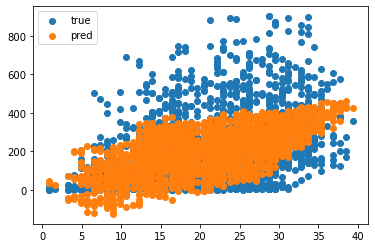

In [27]:
plt.scatter(X_test_3[:, 4], y_test_3, label="true")
plt.scatter(X_test_3[:, 4], predictions_3, label="pred")
plt.legend()
plt.show()

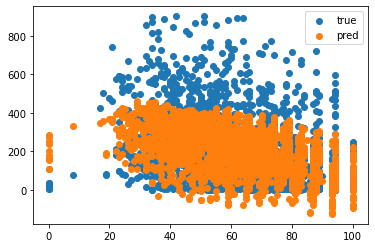

In [28]:
plt.scatter(X_test_3[:, 6], y_test_3, label="true")
plt.scatter(X_test_3[:, 6], predictions_3, label="pred")
plt.legend()
plt.show()